# Task 3 --> Car Price Prediction With Machine Learning

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Load the car dataset
car_data = pd.read_csv('car data.csv') 

In [34]:
# Display the first few rows of the dataset and column names
print(car_data.head())
print("Column Names:" , car_data.columns)

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
Column Names: Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [35]:
# Data Exploration and Visualization
plt.figure(figsize=(16, 8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

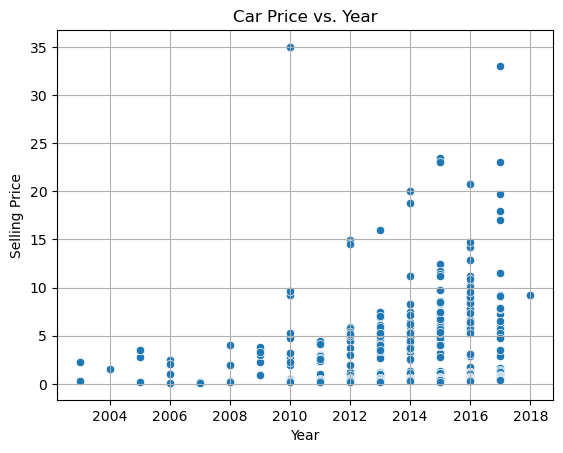

In [36]:
# Scatter plot of car prices vs. year
sns.scatterplot(x='Year', y='Selling_Price', data=car_data)
plt.title('Car Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

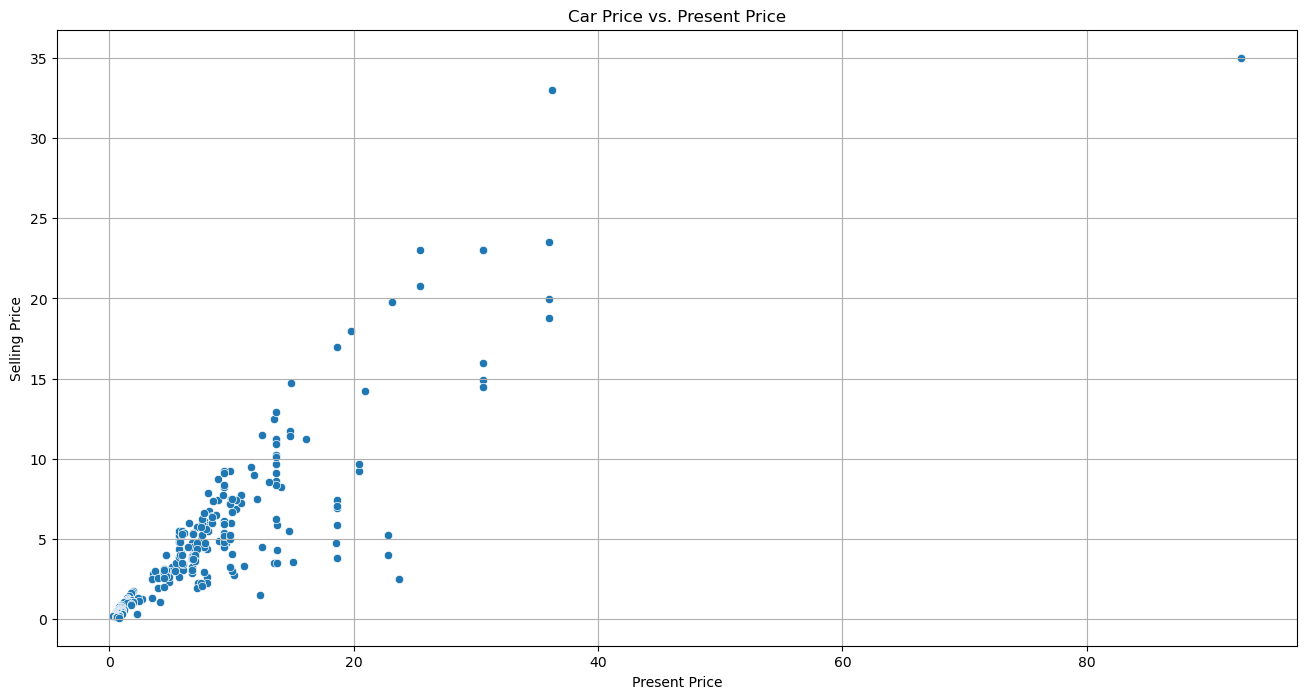

In [37]:
# Scatter plot of car prices vs. present price
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=car_data)
plt.title('Car Price vs. Present Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

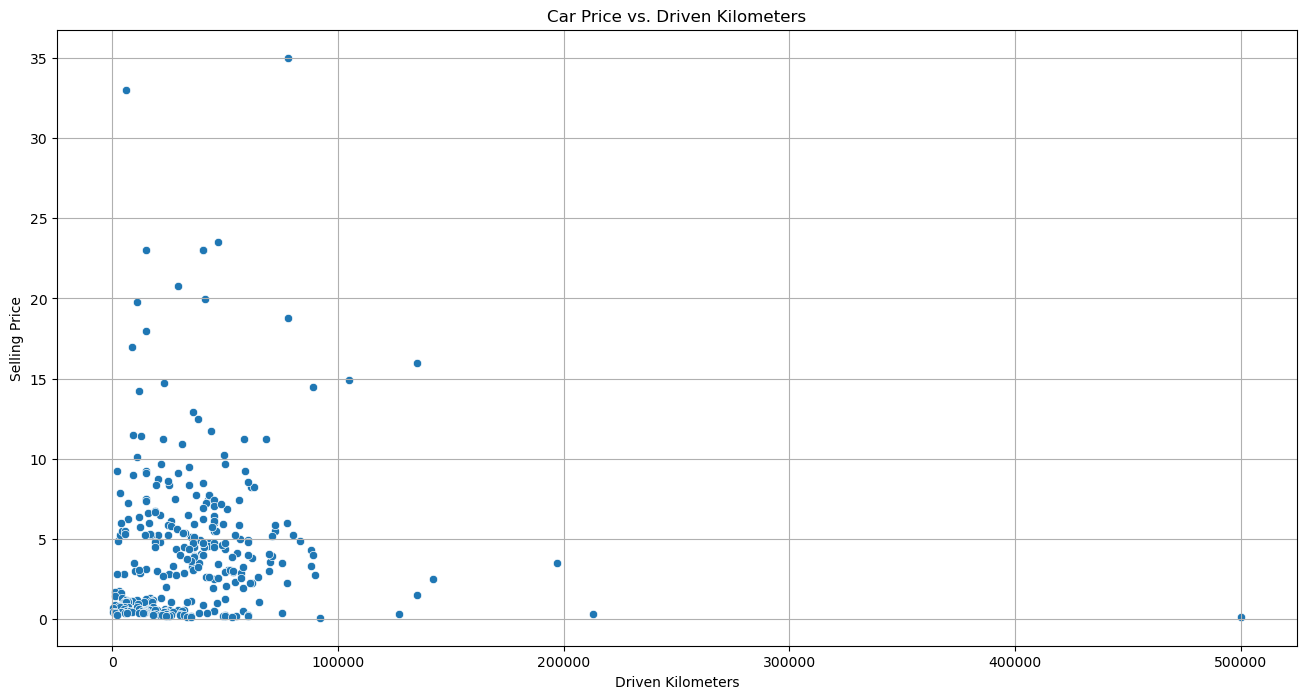

In [38]:
# Scatter plot of car prices vs. kilometers driven
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=car_data)
plt.title('Car Price vs. Driven Kilometers')
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

In [39]:
# Data Preprocessing
# Select relevant features
selected_features = ['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
X = car_data[selected_features]
y = car_data['Selling_Price']

In [40]:
# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [44]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 0.8209857844262285
R-squared (R2) Score: 0.9643601062650229


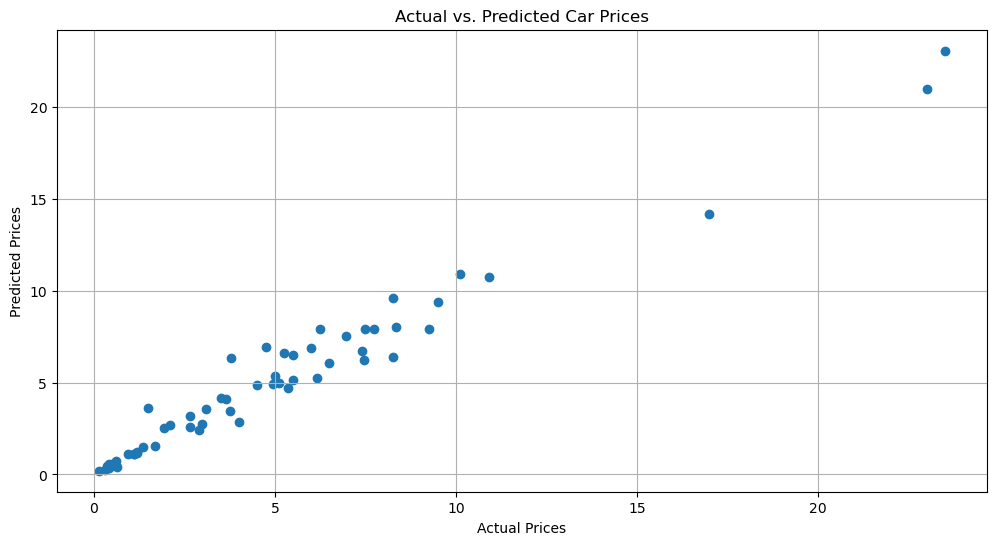

In [45]:
# Visualize actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted Car Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()